In [1]:
import pandas as pd

path="https://raw.githubusercontent.com/DeboraMandon/video_game_sales_analysis/main/vgsales.csv"
df=pd.read_csv(path, index_col=0)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [2]:
# TYPE DE VARIABLE
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB
None


In [3]:
# TAUX DE NA
########## PART D
print(df.isna().sum())
#pourcentage de valeur nulle pour la variable Year
Year_Na=(df['Year'].isna().sum())/(len(df['Year']))
Year_Na=Year_Na*100
print('Year',round(Year_Na,2),'%')

#pourcentage de valeur nulle pour la variable Publisher
Year_Na=(df['Publisher'].isna().sum())/(len(df['Publisher']))
Year_Na=Year_Na*100
print('Publisher',round(Year_Na,2),'%')

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64
Year 1.63 %
Publisher 0.35 %


In [4]:
# ETENDUE DES VALEURS
print(df['Platform'].unique())
print(df['Year'].unique())
print(df['Genre'].unique())
print(df['Publisher'].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2003. 1986. 2000.   nan 1995. 2016. 1991. 1981. 1987.
 1980. 1983. 2020. 2017.]
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment'
 'Sony Computer Entertainment Europe' 'Square Enix' 'LucasArts'
 'Virgin Interactive' 'Warner Bros. Interactive Entertainment'
 'Universal Interactive' 'Eidos Interactive' 'RedOctane' 'Vi

In [5]:
# RELATION ENTRE LES VALEURS
########## PART D
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


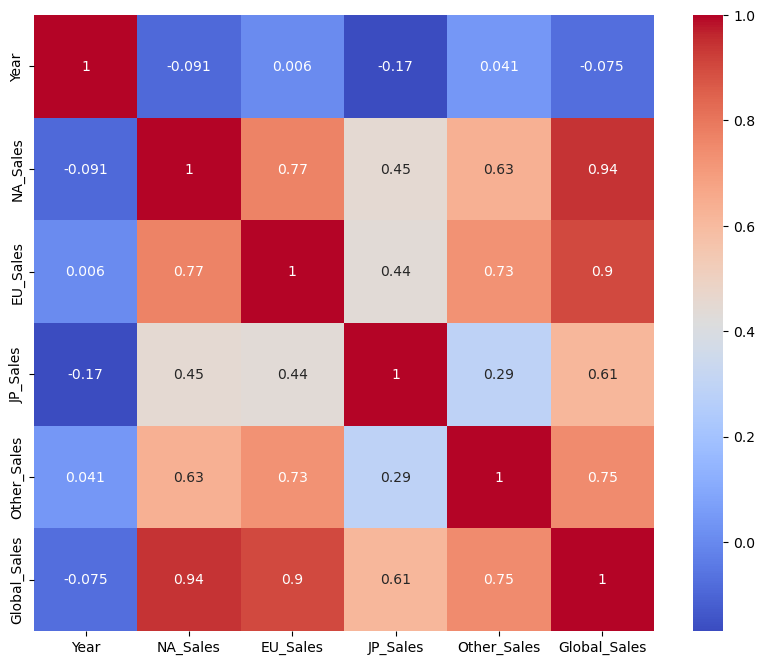

In [6]:
#Heatmap
cor = df.corr()


fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cor, annot = True, ax=ax, cmap ='coolwarm');


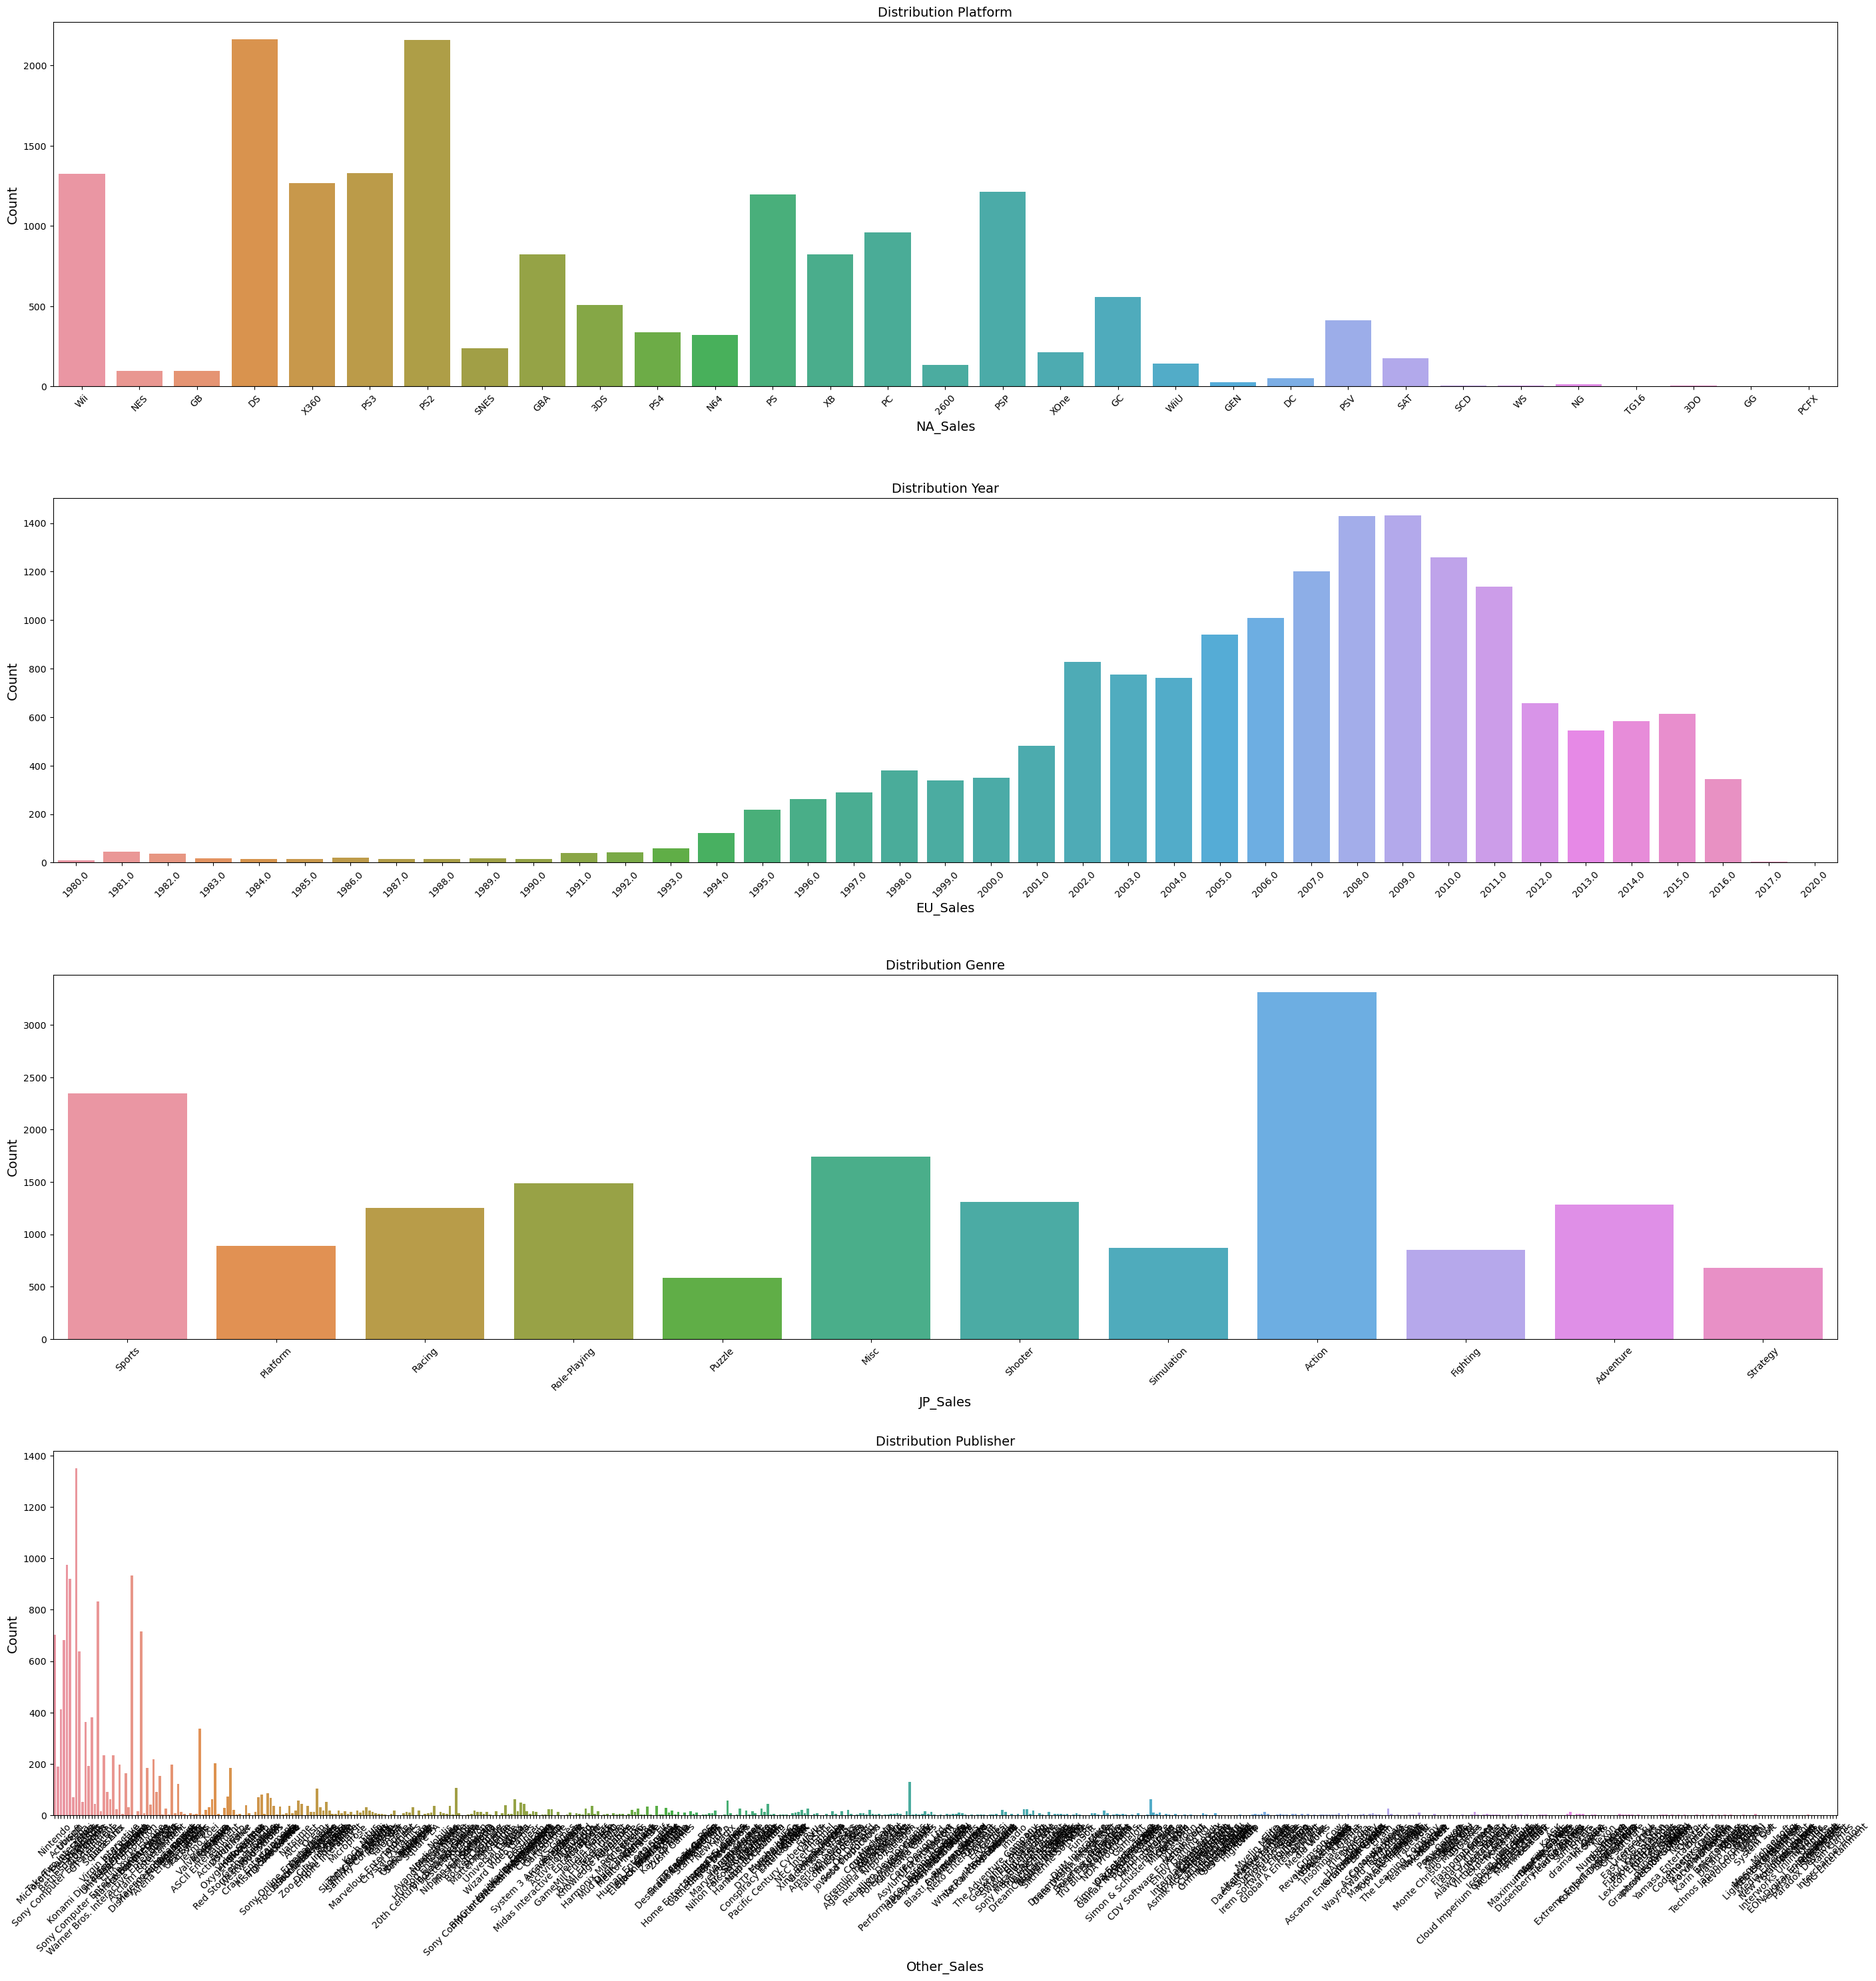

In [7]:
#VISU Global
Quali = ["Platform", "Year", "Genre", "Publisher"]
Quanti = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]

fig, axis = plt.subplots(4,1,figsize=(30,30))
fig.tight_layout(pad=10.0)
col_number = 0

for i in range(4):
    sns.countplot(ax=axis[i], x=df[Quali[col_number]])
    axis[i].set_xlabel(Quanti[col_number], fontsize=14);
    axis[i].set_ylabel('Count', fontsize=14);
    axis[i].set_title(f'Distribution { Quali[col_number] }', fontsize=14)
    axis[i].set_xticklabels(axis[i].get_xticklabels(), rotation=45)
    col_number += 1


plt.show()

#On remarque qu'il existe beaucoup de valeurs pours la variable publisher

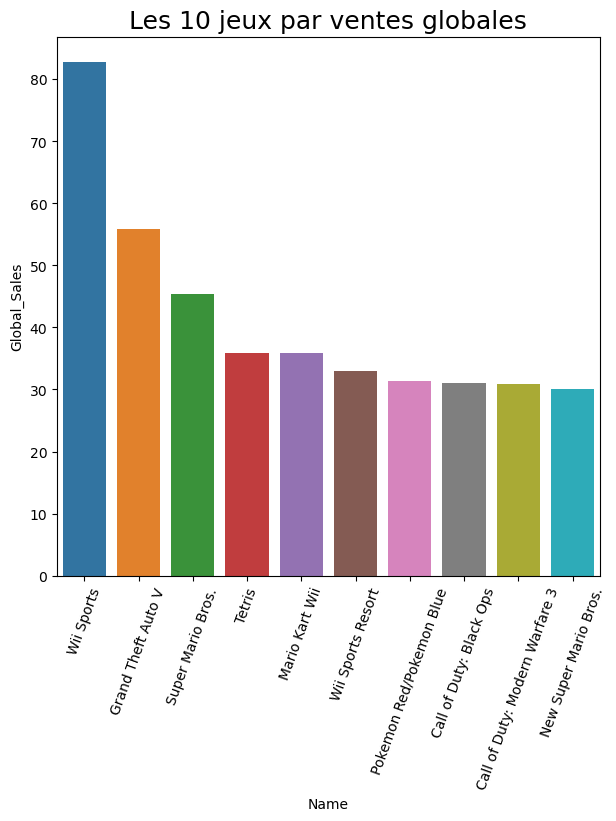

In [19]:
#TOP 10 des jeux en fonction des ventes globales

top_10_game_sales = df.groupby("Name")["Global_Sales"].sum().nlargest(10).sort_values(ascending=False).reset_index()
top_10_game_sales


fig = plt.figure(figsize = (7,7))
plt.title('Les 10 jeux par ventes globales', fontsize=18)
sns.barplot(x=top_10_game_sales['Name'], y=top_10_game_sales['Global_Sales'], 
            order=top_10_game_sales['Name'].values)

plt.xticks(rotation=70);

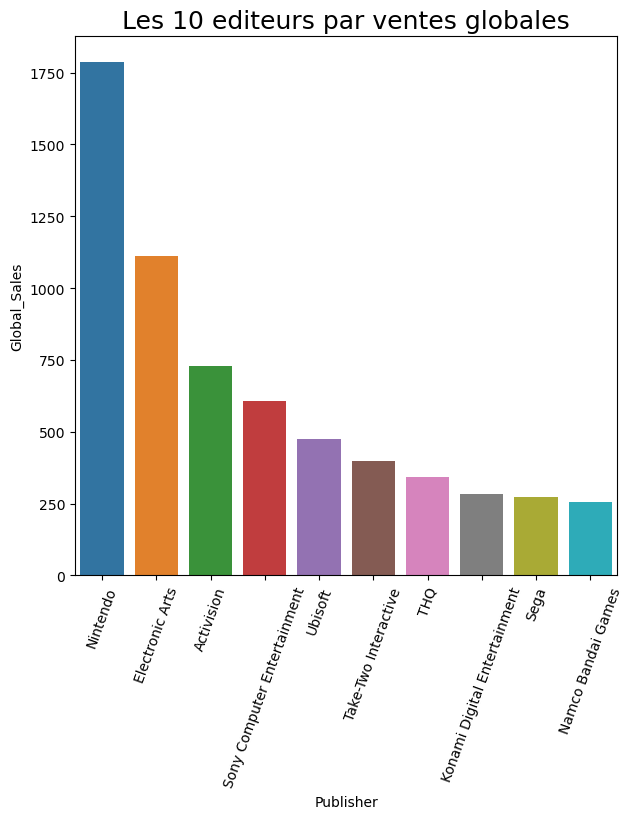

In [18]:
#TOP 10 DES EDITEURS DE JEU en fonction des ventes globales

top_10_pub_sales = df.groupby("Publisher")["Global_Sales"].sum().nlargest(10).sort_values(ascending=False).reset_index()
top_10_pub_sales 


fig = plt.figure(figsize = (7,7))
plt.title('Les 10 editeurs par ventes globales', fontsize=18)
sns.barplot(x=top_10_pub_sales['Publisher'], y=top_10_pub_sales['Global_Sales'], 
            order=top_10_pub_sales['Publisher'].values)

plt.xticks(rotation=70);


In [20]:
#Ventes par platforme 
platform_sales = df[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
platform_sales= platform_sales.groupby("Platform").sum().round(1)
platform_sales.style.background_gradient(cmap = "coolwarm")

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,
2600,90.600000,5.500000,0.000000,0.900000
3DO,0.000000,0.000000,0.100000,0.000000
3DS,78.900000,58.500000,97.400000,12.600000
DC,5.400000,1.700000,8.600000,0.300000
DS,390.700000,194.600000,175.600000,60.500000
GB,114.300000,47.800000,85.100000,8.200000
GBA,187.500000,75.200000,47.300000,7.700000
GC,133.500000,38.700000,21.600000,5.200000
GEN,19.300000,5.500000,2.700000,0.900000


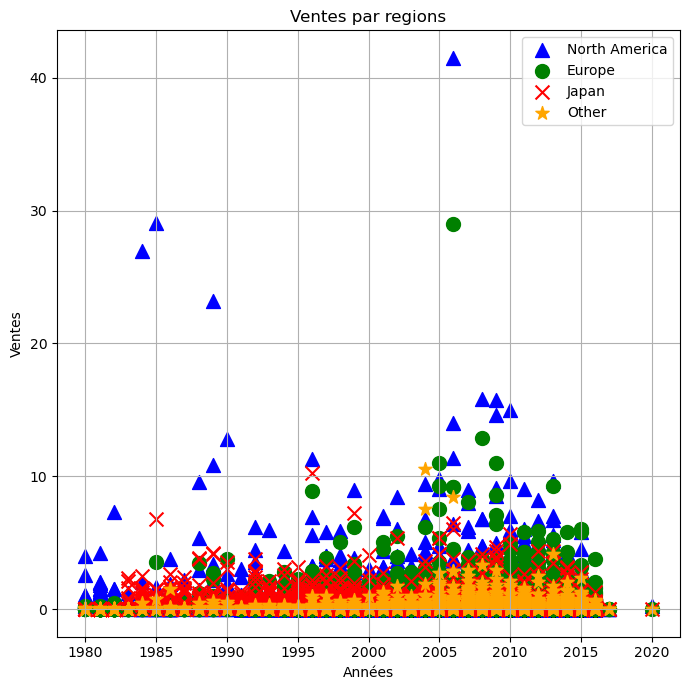

In [21]:
#Ventes par region 
plt.figure(figsize=(7,7))
plt.grid(True)
plt.scatter(x=df['Year'],y=df['NA_Sales'],color ="blue",s=100,marker='^',label ="North America")
plt.scatter(x=df['Year'],y=df['EU_Sales'],color ="green",s=100,marker='o',label ="Europe")
plt.scatter(x=df['Year'],y=df['JP_Sales'],color ="red",s=100,marker='x',label ="Japan")
plt.scatter(x=df['Year'],y=df['Other_Sales'],color ="orange",s=100,marker='*',label ="Other")

plt.title('Ventes par regions')
plt.xlabel('Années')
plt.ylabel('Ventes')
 
plt.legend(loc='upper right')
plt.tight_layout()
 
plt.show()